In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import re

# Problem 1 

## 1a

In [2]:
cols = list(pd.read_csv("train.csv", nrows =1))
train = pd.read_csv("train.csv", usecols =[i for i in cols if i not in ["id","date","zipcode"]])
train = train.drop(columns=['Unnamed: 0'])

X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0:1]

model_a = LinearRegression().fit(X_train, Y_train)
coeff = pd.DataFrame(model_a.coef_.T,X_train.columns,columns=['Coefficients'])
print("Intercept : ",model_a.intercept_[0])
coeff

Intercept :  -23088898.60853133


,Coefficients
bedrooms,-14704.280497
bathrooms,25687.783987
sqft_living,83.084210
sqft_lot,0.375930
floors,15555.580988
waterfront,715535.170469
view,63027.898001
condition,18816.402756
grade,79534.602722
sqft_above,42.010495


In [3]:
Y_pred = model_a.predict(X_train)
print('Mean Squared Error for train data using model_a:', metrics.mean_squared_error(Y_train, Y_pred))

Mean Squared Error for train data using model_a: 31486167775.7949


## 1b

In [4]:
ss_scaler = preprocessing.StandardScaler()
train_col = train.columns
scaled_data = pd.DataFrame(ss_scaler.fit_transform(train.values),columns = train_col)
data = scaled_data.copy()
X_scaled = data.iloc[:,1:]
Y_scaled = data[["price"]]
# model_b = LinearRegression().fit(X_scaled, Y_scaled)

model_b = LinearRegression().fit(X_scaled, Y_scaled)
coeff = pd.DataFrame(model_b.coef_.T,X_scaled.columns,columns=['Coefficients'])
print("Intercept : ",model_b.intercept_[0])
coeff

Intercept :  3.086029186623574e-15


,Coefficients
bedrooms,-0.036903
bathrooms,0.054602
sqft_living,0.167243
sqft_lot,0.032070
floors,0.023706
waterfront,0.187856
view,0.142050
condition,0.038207
grade,0.271814
sqft_above,0.142315


In [5]:
Y_pred_scaled = model_b.predict(X_scaled)
print('Mean Squared Error for training data using model_b:', metrics.mean_squared_error(Y_scaled, Y_pred_scaled))

Mean Squared Error for training data using model_b: 0.2734665681293983


## 1c

In [6]:
cols = list(pd.read_csv("test.csv", nrows =1))
test = pd.read_csv("test.csv", usecols =[i for i in cols if i not in ["id","date","zipcode"]])
test = test.iloc[:,1:]
X_test = test.iloc[:,1:]
Y_test = test.iloc[:,0:1]
Y_pred_test = model_a.predict(X_test)
print('Mean Squared Error for test data using model_a:', metrics.mean_squared_error(Y_test, Y_pred_test))

Mean Squared Error for test data using model_a: 57628154705.675156


In [7]:
test_col = test.columns
scaled_data_test = pd.DataFrame(ss_scaler.transform(test.values),columns=test_col)
X_test_scaled = scaled_data_test.iloc[:,1:].values
Y_test_scaled = scaled_data_test.iloc[:,0:1].values
Y_pred_test_scaled = model_b.predict(X_test_scaled)
print('Mean Squared Error for test data using model_b:', metrics.mean_squared_error(Y_test_scaled, Y_pred_test_scaled))

Mean Squared Error for test data using model_b: 0.5005173639170148


## 1d

The coefficients obtained after learning from the unscaled data cannot be compared as they are in different units of measurements respectively. However after feature scaling of the training data, the coefficients can be compared to one another as the features where brought to the same scale before training. The MSE obtained from the unscaled data is a large number and not very intuitive compared to the MSE obtained from the test data to be compared. The features grade, latitude, view, waterfront, sqft_living,sqft_living15,sqft_above and yr_built mostly contribute to the linear regression model based on the coefficients. 

In [8]:
r_squared= metrics.r2_score(Y_test_scaled, Y_pred_test_scaled)
print('coefficient of determination:', r_squared)

coefficient of determination: 0.6543560876120955


Based on the R-Squared error, 65.4% of the variation in y can be explained by the dependence on features using the regression model

The model error is 0.5005173639170148.

# Problem 2

## 2 a,b 

In [9]:
def ClosedFormSoln(X, Y):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    X=X.values
    Y=Y.values
    ## calculating the closed form solution to get parameters theta
    X_transpose = np.transpose(X)
    # calculating the dot product
    X_transpose_dotp_x = X_transpose.dot(X)
    # Calculating the inverse
    temp_1 = np.linalg.pinv(X_transpose_dotp_x)

    ##Calculating the second half i.e. (X transpose Y)
    temp_2 = X_transpose.dot(Y)

    ##Calculating theta
    theta = temp_1.dot(temp_2)
    return(theta)

def predict_ClosedFormSoln(theta, X):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)    
    X=X.values
    Y_pred = X.dot(theta)
    return Y_pred

In [10]:
#Initializing data
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train[["sqft_living"]]
X_test = test[["sqft_living"]]

In [11]:
# X_test can be a single sample or multiple sample (X_test = test[["sqft_living"]])
X_test = X_test.iloc[0:1,:]

In [12]:
theta_single_dim = ClosedFormSoln(X_train,Y_train)
Y_pred = predict_ClosedFormSoln(theta_single_dim,X_test)
print('Response for a new single-dimensional data point: ', Y_pred[0])

Response for a new single-dimensional data point:  [-0.17565766]


In [13]:
#Initializing data
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

In [14]:
# X_test can be a single sample here in the code snippet it takes the first row of the test data
# or multiple rows using (X_test = test.iloc[:,1:])
X_test = X_test.iloc[0:1,:]

In [15]:
theta_multi_dim = ClosedFormSoln(X_train,Y_train)
Y_pred = predict_ClosedFormSoln(theta_multi_dim,X_test)
print('Response for a new multi-dimensional data point: ', Y_pred[0])

Response for a new multi-dimensional data point:  [0.45660638]


## 2c 

Since the closed form gives the global optimum hence the parameters obtained from the closed form solution are same as those obtained from the linear model implemented using the packages. This is the reason the MSE values obtained using the closed form implementation are similar to those obtained using the packages as seen from the output below.

In [16]:
#Initializing data
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

In [17]:
Y_pred_train = predict_ClosedFormSoln(theta_multi_dim,X_train)
Y_pred_test = predict_ClosedFormSoln(theta_multi_dim,X_test)
print('Mean Squared Error for training data using closed form solution:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('Mean Squared Error for test data using closed form solution:', metrics.mean_squared_error(Y_test, Y_pred_test))

Mean Squared Error for training data using closed form solution: 0.2734665681293983
Mean Squared Error for test data using closed form solution: 0.5005173639170145


# Problem 3

## 3a

In [18]:
# Compute Cost function is implemented to check if the cost is decreasing with iterations
def ComputeCost(X,Y,theta):
    N = Y.shape[0]
    temp = X.dot(theta) - Y
    cost = (1/N)*np.transpose(temp).dot(temp)
    return cost

# Method to compute the theta values using gradient descent
def gradient_descent(X, Y, alpha, num_iters):
    iters = num_iters
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    # d is the number of features    
    d = X_train.shape[1]
    # Initializing theta with zeros
    theta = np.zeros((d,1))    
    X=X.values
    Y=Y.values
    diff_cost = 0
    N = Y.shape[0]
    theta_old = theta
    #while diff_cost > 0.000001 or num_iters > 0
    while num_iters > 0:
        temp = np.transpose(X.dot(theta_old) - Y).dot(X)
        theta_new = theta_old - alpha * (2/N) * np.transpose(temp)
        # checking for convergence
        delta_theta = theta_new - theta_old
        delta = np.sqrt(np.transpose(delta_theta).dot(delta_theta))
        if delta < 0.00001 and iters != num_iters :
            print("Gradient descent converged at iteration", iters-num_iters)
            break
        num_iters = num_iters - 1
        theta_old = theta_new
        #old_cost = ComputeCost(X,Y,theta_old)
        #new_cost = ComputeCost(X,Y,theta_new)
        #diff_cost = old_cost - new_cost        
    return theta_new

# predict the y values using theta and X
def predict_GradientDescent(theta, X):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    X = X.values
    Y_pred = X.dot(theta)
    return Y_pred

## 3b

In [19]:
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

In [20]:
alpha = [0.01, 0.03, 0.1]
num_iters = [10, 50, 100]

for i in alpha:
    for j in num_iters :
        theta = gradient_descent(X_train, Y_train, i, j)
        print('theta when alpha = ' + str(i) + ' and num_iters = ' + str(j) + ':\n', theta)
        print("\n")
        Y_pred_train = predict_GradientDescent(theta, X_train)
        Y_pred_test = predict_GradientDescent(theta, X_test)
        print('MSE for training data using Gradient descent when alpha = ' + str(i) +
              ' and num_iters = ' + str(j) + ':', metrics.mean_squared_error(Y_train, Y_pred_train))
        print('MSE for testing data using Gradient descent when alpha = ' + str(i) +
              ' and num_iters = '+ str(j) + ':', metrics.mean_squared_error(Y_test, Y_pred_test))
        print("\n")
        

theta when alpha = 0.01 and num_iters = 10:
 [[ 8.24229573e-17]
 [ 3.51546174e-02]
 [ 5.97764565e-02]
 [ 9.46499119e-02]
 [ 1.58577098e-02]
 [ 2.80724205e-02]
 [ 5.14216548e-02]
 [ 6.74806965e-02]
 [ 1.46048174e-02]
 [ 8.81429767e-02]
 [ 7.58100530e-02]
 [ 5.35522376e-02]
 [-1.19508461e-02]
 [ 2.46116923e-02]
 [ 6.15128542e-02]
 [-4.24986932e-03]
 [ 8.66260205e-02]
 [ 1.73904498e-02]]


MSE for training data using Gradient descent when alpha = 0.01 and num_iters = 10: 0.4769826562643797
MSE for testing data using Gradient descent when alpha = 0.01 and num_iters = 10: 0.7899805878552555


theta when alpha = 0.01 and num_iters = 50:
 [[ 6.05232531e-16]
 [ 1.76980518e-02]
 [ 7.02037279e-02]
 [ 1.61104777e-01]
 [ 1.07199113e-02]
 [ 3.27773917e-02]
 [ 1.35936441e-01]
 [ 1.46319888e-01]
 [ 4.29116775e-02]
 [ 1.66822006e-01]
 [ 1.25277756e-01]
 [ 9.77393699e-02]
 [-9.43446724e-02]
 [ 6.27487154e-02]
 [ 1.77221329e-01]
 [-3.88336062e-02]
 [ 1.51099990e-01]
 [ 7.90555822e-03]]


MSE for trainin

## 3c

The MSE value for the training and the testing data using Gradient Descent for Alpha = 0.1 and iterations = 100 with theta being initialized with all zeroes; is almost similar to those obtained with the package. The more the number of iterations, the closer the MSE is to the one obtained using the package. We can observe that even with smaller learning rate, the algorithm converges if provided with sufficient number of iterations. The MSE value is small for a bigger learning rate compared to the small learning rates for the same number of iterations. 
The objective decreases for the selected learning rates with each iterations however if the learning rate is selected as 0.2 the cost increases with each iteration and hence cannot be selected as an alpha value for gradient descent.
Using the above implementation, the algorithm is converging with the number of iterations reaching the maximum number of iterations. 

\pagebreak

## 3d

In [21]:
# Compute Cost function is implemented to check if the cost is decreasing with iterations
def ComputeCost(X,Y,theta):
    N = Y.shape[0]
    temp = X.dot(theta) - Y
    cost = (1/N)*np.transpose(temp).dot(temp)
    return cost

# Method to compute the theta values using gradient descent
def gradient_descent_line_search(X, Y, alpha_max, step, e, T):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    # d is the number of features    
    d = X_train.shape[1]
    # Initializing theta with zeros
    theta = np.zeros((d,1))
    
    X=X.values
    Y=Y.values
    N = Y.shape[0]
    delta = 1
    alpha = alpha_max     
    backtrack = T
    while(delta > 0.0001):
        T = backtrack
        theta_try = theta
        while(T>0):
            temp = np.transpose(X.dot(theta) - Y).dot(X)
            theta_try = theta - alpha * (2/N) * np.transpose(temp)
            if abs((ComputeCost(X,Y, theta) - ComputeCost(X,Y, theta_try))) > e:
                theta = theta_try
                #break
            else:    
                alpha = step * alpha
            T = T-1
        delta_theta = theta_try - theta    
        delta = np.sqrt(np.transpose(delta_theta).dot(delta_theta))   
    return theta  


# predict the y values using theta and X
def predict_GradientDescent(theta, X):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    X = X.values
    Y_pred = X.dot(theta)
    return Y_pred

In [22]:
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

In [23]:
alpha = [0.01, 0.03, 0.1]
backtrack = [10, 50, 100]

for i in alpha:
    for j in backtrack :
        theta = gradient_descent_line_search(X_train, Y_train, i, 0.5, 0.0001, j)
        #print('theta when alpha = ' + str(i) + ' and num_iters = ' + str(j) + ':\n', theta)
        #print("\n")
        Y_pred_train = predict_GradientDescent(theta, X_train)
        Y_pred_test = predict_GradientDescent(theta, X_test)
        print('MSE for training data using Gradient descent when alpha = ' + str(i) +
              ' and backtrack = ' + str(j) + ':', metrics.mean_squared_error(Y_train, Y_pred_train))
        print('MSE for testing data using Gradient descent when alpha = ' + str(i) +
              ' and backtrack = '+ str(j) + ':', metrics.mean_squared_error(Y_test, Y_pred_test))
        print("\n")

MSE for training data using Gradient descent when alpha = 0.01 and backtrack = 10: 0.4769826562643797
MSE for testing data using Gradient descent when alpha = 0.01 and backtrack = 10: 0.7899805878552555


MSE for training data using Gradient descent when alpha = 0.01 and backtrack = 50: 0.2935883463907345
MSE for testing data using Gradient descent when alpha = 0.01 and backtrack = 50: 0.5343327522759017


MSE for training data using Gradient descent when alpha = 0.01 and backtrack = 100: 0.27842422313332665
MSE for testing data using Gradient descent when alpha = 0.01 and backtrack = 100: 0.5124065597546549


MSE for training data using Gradient descent when alpha = 0.03 and backtrack = 10: 0.32025061817365497
MSE for testing data using Gradient descent when alpha = 0.03 and backtrack = 10: 0.5706630290510314


MSE for training data using Gradient descent when alpha = 0.03 and backtrack = 50: 0.27588674681517505
MSE for testing data using Gradient descent when alpha = 0.03 and backtra

The values of MSE in the training and testing data using gradient descent using line search is almost similar to those obtained using Gradient descent. 

# Problem 4

\pagebreak

## 4b

In [24]:
def ClosedForm_RidgeRegression(X, Y, lambda_r):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    X=X.values
    Y=Y.values
    ## calculating the closed form solution to get parameters theta
    X_transpose = np.transpose(X)
    # calculating the dot product
    X_transpose_dotp_x = X_transpose.dot(X)
    
    # Matrix for Regularization term
    L = np.identity(X.shape[1])
    #No regularization/penalizing on the theta0
    L[0][0]=0
    # Calculating the inverse
    temp_1 = np.linalg.pinv(X_transpose_dotp_x + (lambda_r * L))

    ##Calculating the second half i.e. (X transpose Y)
    temp_2 = X_transpose.dot(Y)

    ##Calculating theta
    theta = temp_1.dot(temp_2)
    return(theta)

def predict(theta, X):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    Y_pred = X.dot(theta)
    return Y_pred

In [25]:
#Initializing data
train = scaled_data.copy()
test = scaled_data_test.copy()
# Y values
Y_train = train[["price"]]
Y_test = test[["price"]]
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Mean Squared Error for training data using closed form solution with lambda= 1:  0.2734668788542625
Mean Squared Error for training data using closed form solution with lambda= 2:  0.27346780421401556
Mean Squared Error for training data using closed form solution with lambda= 3:  0.2734693341886705
Mean Squared Error for training data using closed form solution with lambda= 4:  0.2734714590206986
Mean Squared Error for training data using closed form solution with lambda= 5:  0.2734741692062795
Mean Squared Error for training data using closed form solution with lambda= 6:  0.27347745548689273
Mean Squared Error for training data using closed form solution with lambda= 7:  0.2734813088412359
Mean Squared Error for training data using closed form solution with lambda= 8:  0.2734857204774564
Mean Squared Error for training data using closed form solution with lambda= 9:  0.2734906818256808
Mean Squared Error for training data using closed form solution with lambda= 10:  0.27349618453083

Mean Squared Error for training data using closed form solution with lambda= 86:  0.27507311413138086
Mean Squared Error for training data using closed form solution with lambda= 87:  0.27510531926716997
Mean Squared Error for training data using closed form solution with lambda= 88:  0.27513775416702535
Mean Squared Error for training data using closed form solution with lambda= 89:  0.27517041699651146
Mean Squared Error for training data using closed form solution with lambda= 90:  0.27520330594699766
Mean Squared Error for training data using closed form solution with lambda= 91:  0.27523641923511644
Mean Squared Error for training data using closed form solution with lambda= 92:  0.27526975510223745
Mean Squared Error for training data using closed form solution with lambda= 93:  0.2753033118139544
Mean Squared Error for training data using closed form solution with lambda= 94:  0.2753370876595843
Mean Squared Error for training data using closed form solution with lambda= 95:  0.

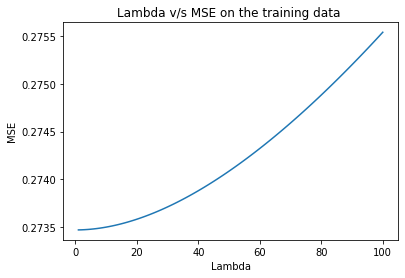

In [26]:
#lambda_list = [0,1,2,5,10,15,20,30,50,75,100,500,1000,2000,3000,5000]
#lambda_list = [0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
lambda_list = []
MSE_train = []
#for i in np.arange(1,100,1):
for i in range(1,101,1):
#for i in lambda_list:
    lambda_list.append(i)
    theta = ClosedForm_RidgeRegression(X_train,Y_train,i)
    #print(theta)
    Y_pred = predict(theta,X_train)
    print('Mean Squared Error for training data using closed form solution with lambda= '+ str(i) + ': ', 
          metrics.mean_squared_error(Y_train, Y_pred))
    #print("\n")
    MSE_train.append(metrics.mean_squared_error(Y_train, Y_pred))
    
min_lambda = lambda_list[MSE_train.index(min(MSE_train))]
print("\n")
print("Minimum MSE value for the training data = ", min(MSE_train), "obtained for lambda =", min_lambda)    
plt.plot(lambda_list,MSE_train)
plt.title("Lambda v/s MSE on the training data ")
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()

In [109]:
import re
MSE_test = []
lambda_list = []
for i in [1e-15,1e-11,1,10,50,100]:
#for i in np.arange(1e-15,1e-7,1e-15):
#for i in range(1,3000,1):
    lambda_list.append(i)
    theta = ClosedForm_RidgeRegression(X_train,Y_train,i)
    Y_pred = predict(theta,X_test)
    print('Mean Squared Error for testing data using closed form solution with lambda= '+ str(i) + ': ', 
          metrics.mean_squared_error(Y_test, Y_pred))
    MSE_3dig = re.match(r'\d+.\d{6}',str((metrics.mean_squared_error(Y_test, Y_pred)))).group(0)
    MSE_test.append(float(MSE_3dig))
print("\n")    
min_lambda = lambda_list[MSE_test.index(min(MSE_test))]    
print("Minimum MSE value for the testing data = ", min(MSE_test), "obtained for lambda =", min_lambda)


     

Mean Squared Error for testing data using closed form solution with lambda= 0:  0.5005173639170145
Mean Squared Error for testing data using closed form solution with lambda= 1e-15:  0.5005173639170145
Mean Squared Error for testing data using closed form solution with lambda= 1e-11:  0.4999094328460266
Mean Squared Error for testing data using closed form solution with lambda= 1:  0.5005925887198549
Mean Squared Error for testing data using closed form solution with lambda= 10:  0.5012912917578864
Mean Squared Error for testing data using closed form solution with lambda= 50:  0.5047192049914125
Mean Squared Error for testing data using closed form solution with lambda= 100:  0.5094026518057427


Minimum MSE value for the testing data =  0.499909 obtained for lambda = 1e-11


d:\softwares\python3.7.4\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


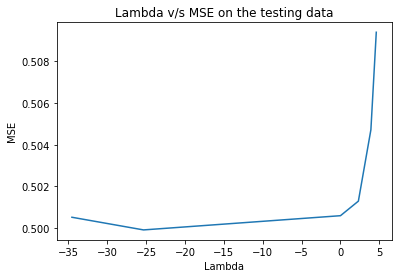

In [110]:
def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = min(y)
    text= "x={:.3f}, y={:.3f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.50,0.50), **kw)

arr = []
for i in lambda_list:
    arr.append(np.log(i))
plt.plot(arr, MSE_test) 
#annot_min(lambda_list, MSE_test)
plt.title("Lambda v/s MSE on the testing data")
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()   

The MSE value for the training data set obtained in the Ridge regression is almost similar to the value obtained in the Linear Regression. 
The MSE value for the testing data set obtained in the Ridge regression is slightly less compared to those obtained in the Linear Regression. 

\pagebreak

# Problem 6

## 6a

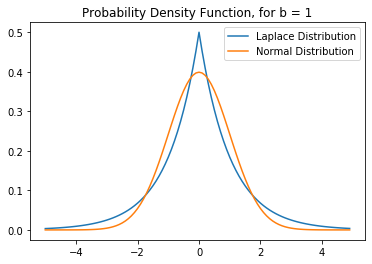

In [29]:
Laplace = []
Normal = []
x_val = np.arange(-5,5,0.1)
b = 1
for x in x_val:
        Laplace.append((1/2*b) * math.exp(-abs(x)/b))
        Normal.append((1/(b * np.sqrt(2*np.pi)) * np.exp(-(x)**2/(2 * b**2))))
plt.plot(x_val,Laplace, label = "Laplace Distribution")
plt.plot(x_val,Normal, label = "Normal Distribution")
plt.legend()
plt.title("Probability Density Function, for b = 1")
plt.show()


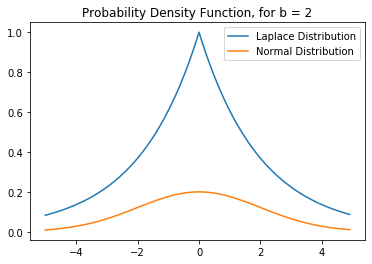

In [30]:
Laplace = []
Normal = []
b = 2
for x in x_val:
        Laplace.append((1/2*b) * math.exp(-abs(x)/b))
        Normal.append((1/(b * np.sqrt(2*np.pi)) * np.exp(-(x)**2/(2 * b**2))))
plt.plot(x_val,Laplace, label = "Laplace Distribution")
plt.plot(x_val,Normal, label = "Normal Distribution")
plt.legend()
plt.title("Probability Density Function, for b = 2")
plt.show()

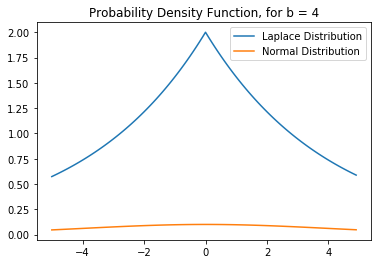

In [31]:
Laplace = []
Normal = []
b = 4
for x in x_val:
        Laplace.append((1/2*b) * math.exp(-abs(x)/b))
        Normal.append((1/(b * np.sqrt(2*np.pi)) * np.exp(-(x)**2/(2 * b**2))))
plt.plot(x_val,Laplace, label = "Laplace Distribution")
plt.plot(x_val,Normal, label = "Normal Distribution")
plt.legend()
plt.title("Probability Density Function, for b = 4")
plt.show()

Normal distribution have very short tails whereas the Laplace distribution have longer tails because the Laplace density is expressed in terms of the absolute difference from the mean.
